In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy
from PIL import Image
import requests
import numpy as np

In [ ]:
!mkdir image

In [ ]:
img1 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/119082.jpg',stream=True).raw)
img2 = Image.open(requests.get('https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/170057.jpg',stream=True).raw)

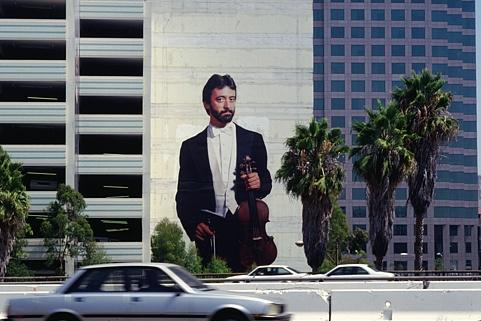

In [ ]:
img1.save('image/1.png')
img2.save('image/2.png')
img1

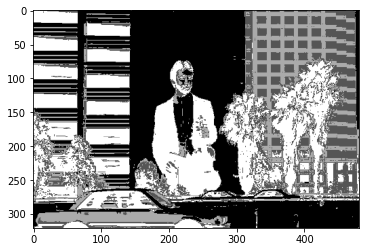

In [ ]:
#image to array
img1_array = np.array(img1)
img2_array = np.array(img2)
# Flatten image array
flat_img_arr = img1_array.reshape((-1, 3))

# Number of clusters
K = 4

# Randomly initialize centroids
centroids = np.random.randint(0, 256, size=(K, 3))

# Repeat until convergence
while True:
    # Assign each pixel to nearest centroid
    distances = np.linalg.norm(flat_img_arr[:, np.newaxis, :] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Update centroids
    new_centroids = np.array([flat_img_arr[labels == k].mean(axis=0) for k in range(K)])

    # Check convergence
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

# Assign each pixel to final cluster
final_distances = np.linalg.norm(flat_img_arr[:, np.newaxis, :] - centroids, axis=2)
final_labels = np.argmin(final_distances, axis=1)

# Reshape labels array to match original image shape
seg_img = final_labels.reshape(img1_array.shape[:2])

# Show segmented image
plt.imshow(seg_img, cmap='gray')
plt.show()